In [4]:
from PIL import Image
import matplotlib.pyplot as plt
# https://proceedings.neurips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf

In [2]:
# 개요
# Alexnet은 ILSVRC 2012에서 Top 5 test error 15.4%로 2위(26.2%)와 큰 차이로 우승한 모델이다

In [3]:
# 대규모 데이터셋에 대해 최고의 성능을 낸 첫번째 CNN 모델
# Dropout. Relu등 다른 논문에서 제안된 방법론을 설계에 잘 이용하여 표준으로 자리잡게끔 함
# 2way gpu를 활용한 병렬구조 사용

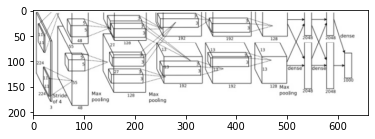

In [6]:
image = Image.open('./images/1.jpg')
plt.imshow(image)

In [12]:
# 모델 구현해보기
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, losses

In [13]:
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train = tf.repeat(x_train, 3, axis=3)
x_test = tf.repeat(x_test, 3, axis=3)
x_val = x_train[-2000:,:,:,:]
y_val = y_train[-2000:]
x_train = x_train[:-2000,:,:,:]
y_train = y_train[:-2000]

In [14]:
from keras import models
from keras import layers
from tensorflow.keras.layers import Input, Dense
model = models.Sequential()
model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=x_train.shape[1:]))
model.add(layers.Conv2D(96, 11, strides=4, padding='same'))
model.add(layers.Lambda(tf.nn.local_response_normalization))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(3, strides=2))
model.add(layers.Conv2D(256, 5, strides=4, padding='same'))
model.add(layers.Lambda(tf.nn.local_response_normalization))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(3, strides=2))
model.add(layers.Conv2D(384, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(384, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(256, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resizing (Resizing)          (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 56, 56, 96)        34944     
_________________________________________________________________
lambda (Lambda)              (None, 56, 56, 96)        0         
_________________________________________________________________
activation (Activation)      (None, 56, 56, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 256)         614656    
_________________________________________________________________
lambda_1 (Lambda)            (None, 7, 7, 256)        

In [16]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=64, epochs=40, validation_data=(x_val, y_val))

Epoch 1/40
907/907 [==============================] - 547s 603ms/step - loss: 0.7424 - accuracy: 0.7293 - val_loss: 0.0794 - val_accuracy: 0.9795
Epoch 2/40
907/907 [==============================] - 534s 589ms/step - loss: 0.1037 - accuracy: 0.9713 - val_loss: 0.0586 - val_accuracy: 0.9850
Epoch 3/40
907/907 [==============================] - 535s 590ms/step - loss: 0.0777 - accuracy: 0.9802 - val_loss: 0.0688 - val_accuracy: 0.9850
Epoch 4/40
907/907 [==============================] - 541s 597ms/step - loss: 0.0592 - accuracy: 0.9845 - val_loss: 0.0724 - val_accuracy: 0.9870
Epoch 5/40
907/907 [==============================] - 537s 592ms/step - loss: 0.0504 - accuracy: 0.9877 - val_loss: 0.0556 - val_accuracy: 0.9885
Epoch 6/40
907/907 [==============================] - 537s 593ms/step - loss: 0.0519 - accuracy: 0.9864 - val_loss: 0.0524 - val_accuracy: 0.9905
Epoch 7/40
907/907 [==============================] - 536s 591ms/step - loss: 0.0419 - accuracy: 0.9897 - val_loss: 0.0515 -

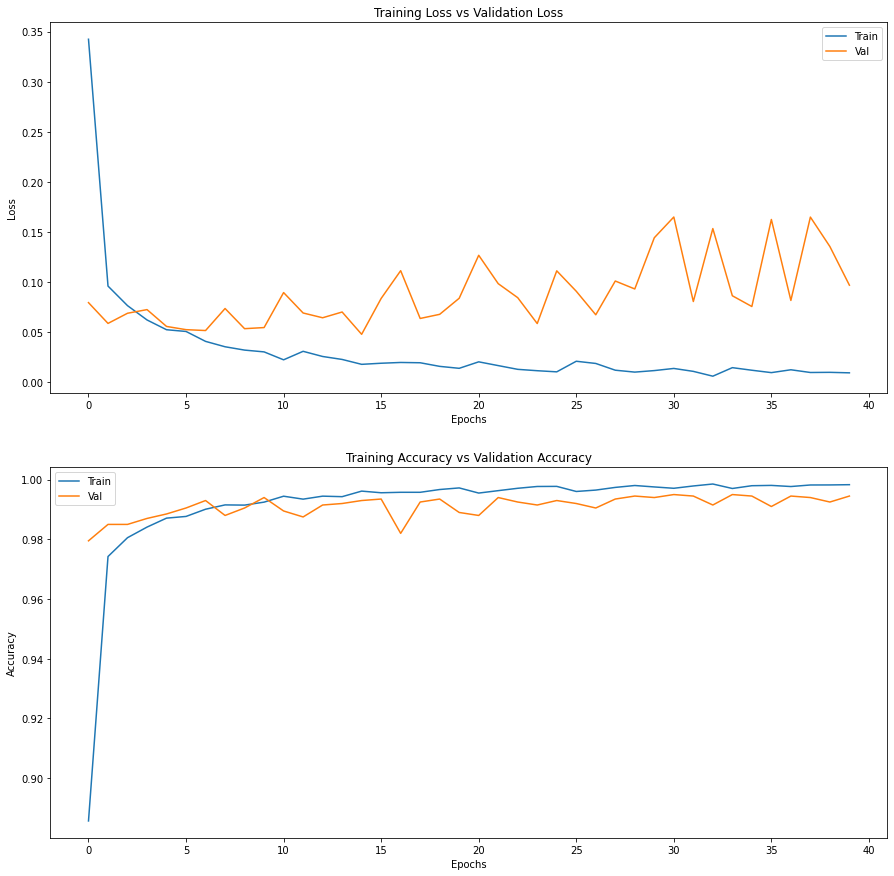

In [17]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train', 'Val'])
axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

In [18]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 22s 69ms/step - loss: 0.1173 - accuracy: 0.9893


[0.11734216660261154, 0.989300012588501]